In [1]:
%matplotlib widget

In [7]:
import numpy as np
import scipy.optimize as sopt
import matplotlib.pyplot as plt
from pydae.plot_tools import set_style
import pydae.ssa as ctrl
colors = set_style(plt)


<img src="./png/wind_farm.png" width="800">



In [3]:
import wind_farm 

In [4]:
model = wind_farm.model()
model.report_params()

S_base =100000000.00
g_W1lv_POI = 0.00
b_W1lv_POI =-200000.00
bs_W1lv_POI = 0.00
U_W1lv_n =690.00
U_POI_n =66000.00
S_n_POI =100000000.00
Omega_b_POI =314.16
K_p_POI = 0.01
T_p_POI = 0.10
K_q_POI = 0.01
T_v_POI = 0.10
X_v_POI = 0.10
R_v_POI = 0.01
K_delta_POI = 0.00
K_sec_POI = 0.00
Droop_POI = 0.05
T_e_POI = 0.10
T_c_POI = 0.10
S_n_W1lv =1000000.00
F_n_W1lv =50.00
K_delta_W1lv = 0.00
K_p_W1lv = 0.02
K_i_W1lv = 0.12
K_g_W1lv = 0.00
R_v_W1lv = 0.00
X_v_W1lv = 0.30
K_q_W1lv = 0.40
T_q_W1lv = 0.03
K_i_q_W1lv = 0.00
K_p_agc = 0.01
K_i_agc = 0.01


In [9]:
ctrl.A_eval(model)
ctrl.damp_report(model)

,Real,Imag,Freq.,Damp
Mode 1,-71.241008,0.000000,0.000000,1.000000
Mode 2,-8.920982,8.126396,1.293356,0.739263
Mode 3,-8.920982,-8.126396,1.293356,0.739263
Mode 4,-1.659460,0.000000,0.000000,1.000000
Mode 5,-0.000996,0.000000,0.000000,1.000000
Mode 6,-10.000000,0.000000,0.000000,1.000000
Mode 7,-10.000571,0.000000,0.000000,1.000000
Mode 8,-0.000500,0.000000,0.000000,1.000000
Mode 9,-10.000000,0.000000,0.000000,1.000000
Mode 10,-1.000000,0.000000,0.000000,1.000000


In [ ]:
ctrl.damp_report(model)

In [6]:
params = {
    "K_i_agc":1.0,
    "K_sec_POI":0.01,"S_n_POI":200e6,"v_ref_POI":1.0,"K_delta_POI":0.001,
    "p_ref_W1lv":0.9,"q_ref_W1lv":0.434616}
model.ini(params,'xy_0.json')
#model.save_xy_0('xy_0.json')
model.report_x()
model.report_y()

delta_POI =  0.00
xi_p_POI = -0.00
e_qv_POI =  1.00
p_ef_POI = -0.00
p_cf_POI =  0.00
delta_W1lv =  0.25
x_v_W1lv = -0.00
e_qm_W1lv = -0.23
xi_q_W1lv =  0.00
xi_freq = -0.45
V_W1lv =  1.00
theta_W1lv =  0.00
V_POI =  1.00
theta_POI =  0.00
omega_POI =  1.00
i_d_POI = -0.00
i_q_POI = -0.00
p_g_POI = -0.00
q_g_POI = -0.00
p_m_POI = -0.00
i_d_ref_W1lv = -0.42
i_q_ref_W1lv =  0.82
p_W1lv =  0.90
q_W1lv =  0.20
e_qv_W1lv =  1.09
omega_coi =  1.00
p_agc = -0.45


In [6]:
model.report_u()

P_W1lv = 0.00
Q_W1lv = 0.00
P_POI = 0.00
Q_POI = 0.00
v_ref_POI = 1.00
p_c_POI = 0.00
omega_ref_POI = 1.00
q_ref_POI = 0.00
p_ref_W1lv = 0.90
q_ref_W1lv = 0.43


In [32]:
zeta = 0.2 # 1.0/np.sqrt(2) 
H_v = 4.0 
WB = 2 *np.pi* 50;
R_v = 0.0
X_v = 0.3

Lt = X_v 
P_max = 1/Lt
fn = np.sqrt(WB*P_max/(2*H_v))/(2*np.pi)

Dp = 0;
K_i = (2*np.pi*fn)**2/(WB*P_max);
K_g = Dp*K_i;
K_p = (2*zeta*2*np.pi*fn - K_g)/(WB*P_max);

T_q = 1.0/(2*np.pi*10/2)
K_q = (1.0 - 0.0)/(1.05 - 0.95)
K_i_q = 1e-6

theta_red = 3.0/180*np.pi
V = 1.0
p_ref = 0.9
q_ref = 0.434616
v_ref = 1.0
K_p

params.update({'K_q_W1lv':K_q,'K_p_W1lv':K_p})
model.ini(params,'xy_0.json')
model.run(1.0,{})
model.run(2.0,{'p_ref_W1lv':0.7})
model.run(5.0,{'q_ref_W1lv':0.5})
model.run(10.0,{})

model.post();

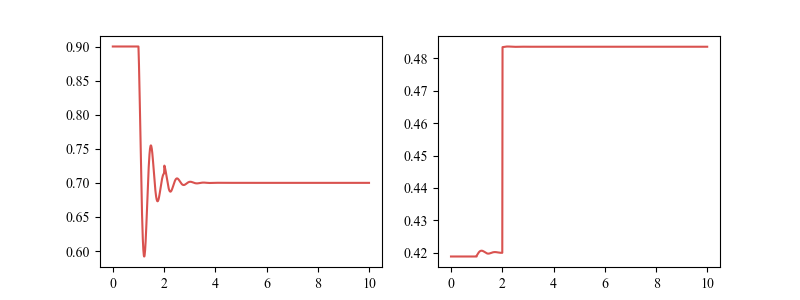

In [33]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 3), frameon=False, dpi=100, squeeze=False)

axes[0,0].plot(model.Time, model.get_values('p_W1lv'), label="$V_{POI}$")
axes[0,1].plot(model.Time, model.get_values('q_W1lv'), label="$V_{POI}$")


array([-1.00000000e-01,  0.00000000e+00, -1.01000000e+01,  1.04000000e+01,
       -1.00000000e+01,  2.79601746e+03, -1.00000000e+02, -9.80100000e+01,
       -1.00000000e+00,  2.79601746e+03, -1.00000000e+02, -9.80100000e+01,
       -1.00000000e+00, -1.00000000e+00, -5.00000000e-02, -5.00000000e-02,
       -5.00000000e-02, -5.00000000e-02,  0.00000000e+00,  0.00000000e+00,
       -7.10542736e-15,  0.00000000e+00, -7.10542736e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.10542736e-15,
        0.00000000e+00,  2.22044605e-16, -2.00000000e-01, -2.00000000e-01,
       -9.00000000e-01,  9.00000000e-02, -1.10000000e-01,  1.00000000e+00,
        1.00000000e+00, -1.99000000e+01, -1.80000000e-01,  2.20000000e-01,
        1.00000000e+00, -3.00000000e+00, -1.00000000e+01, -1.80000000e-01,
        2.20000000e-01,  1.00000000e+00, -3.00000000e+00, -1.00000000e+01,
        2.96666667e+00, -1.00000000e-02])

In [21]:
model.jac_ini[24,:]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.81081081, -0.13513514,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.81081081,
        0.13513514,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])